In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/MyDrive/MyDrive/Data/casos_covid_provincia.csv', sep=';', decimal=',')

In [4]:
df.head()

,fecha,provincia,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida
0,01/01/2020,Alicante,0,0,0,0,0,0
1,01/01/2020,Albacete,0,0,0,0,0,0
2,01/01/2020,Almeria,0,0,0,0,0,0
3,01/01/2020,Avila,0,0,0,0,0,0
4,01/01/2020,Barcelona,0,0,0,0,0,0


In [5]:
df.columns

Index(['fecha', 'provincia', 'num_casos', 'num_casos_prueba_pcr',
       'num_casos_prueba_test_ac', 'num_casos_prueba_ag',
       'num_casos_prueba_elisa', 'num_casos_prueba_desconocida'],
      dtype='object')

In [6]:
df.fecha=pd.to_datetime(df.fecha, format="%d/%m/%Y")

In [7]:
df.head()

,fecha,provincia,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida
0,2020-01-01,Alicante,0,0,0,0,0,0
1,2020-01-01,Albacete,0,0,0,0,0,0
2,2020-01-01,Almeria,0,0,0,0,0,0
3,2020-01-01,Avila,0,0,0,0,0,0
4,2020-01-01,Barcelona,0,0,0,0,0,0


In [8]:
gerona_df = df[df["provincia"] == "Gerona"]
gerona_df.head()

,fecha,provincia,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida
17,2020-01-01,Gerona,0,0,0,0,0,0
70,2020-01-02,Gerona,0,0,0,0,0,0
123,2020-01-03,Gerona,0,0,0,0,0,0
176,2020-01-04,Gerona,0,0,0,0,0,0
229,2020-01-05,Gerona,0,0,0,0,0,0


In [9]:
gerona_df.columns

Index(['fecha', 'provincia', 'num_casos', 'num_casos_prueba_pcr',
       'num_casos_prueba_test_ac', 'num_casos_prueba_ag',
       'num_casos_prueba_elisa', 'num_casos_prueba_desconocida'],
      dtype='object')

In [10]:
gerona_df2 = gerona_df.set_index('fecha').resample('W')[['num_casos']].sum()

In [11]:
gerona_df2.head()

,num_casos
fecha,
2020-01-05,0
2020-01-12,0
2020-01-19,0
2020-01-26,0
2020-02-02,0


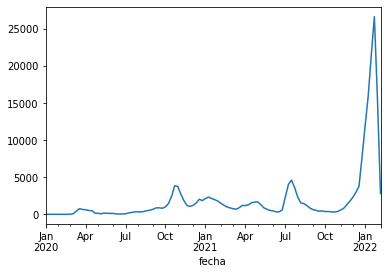

In [12]:
gerona_df2['num_casos'].plot()

In [13]:
# create timeseries readable by fbprophet
ts = pd.DataFrame({'ds':gerona_df2.index,'y':gerona_df2.num_casos})
#ts['cap'] = 30000 # unused in linear growth
#ts['floor'] = 0 # unused in linear growth
ts.head()

,ds,y
fecha,,
2020-01-05,2020-01-05,0
2020-01-12,2020-01-12,0
2020-01-19,2020-01-19,0
2020-01-26,2020-01-26,0
2020-02-02,2020-02-02,0


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


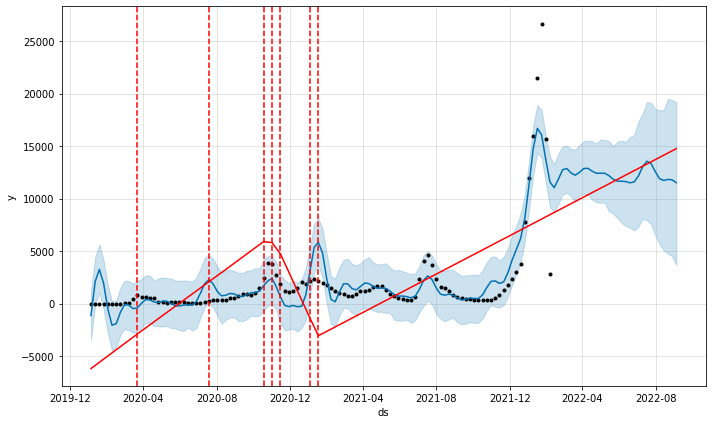

In [14]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
# instantiate the model and fit the timeseries
prophet = Prophet(changepoint_range=0.5,changepoint_prior_scale=0.5)
prophet.fit(ts)

# create a future data frame 
future = prophet.make_future_dataframe(periods=30, freq='W') #documentación para ver cómo poner semanas
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
#fig

In [15]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-05,-1137.214290,-3451.322151,1221.481819
1,2020-01-12,2095.080236,-102.821578,4459.165118
2,2020-01-19,3258.112066,1034.933047,5628.057417
3,2020-01-26,1927.993975,-577.011986,4126.125760
4,2020-02-02,-502.875190,-2774.763557,1766.184152


In [16]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
135,2022-08-07,13914.991334,5679.702007,18404.143448,8084.729540,19782.521258,-2016.008136,-2016.008136,-2016.008136,-2016.008136,-2016.008136,-2016.008136,0.0,0.0,0.0,11898.983199
136,2022-08-14,14124.571894,5061.427521,18413.473392,7959.543800,20404.497372,-2403.777346,-2403.777346,-2403.777346,-2403.777346,-2403.777346,-2403.777346,0.0,0.0,0.0,11720.794548
137,2022-08-21,14334.152453,4753.203427,19482.017093,7773.741647,21030.563191,-2512.688675,-2512.688675,-2512.688675,-2512.688675,-2512.688675,-2512.688675,0.0,0.0,0.0,11821.463777
138,2022-08-28,14543.733012,4526.123174,19377.602405,7605.613839,21580.587219,-2763.075900,-2763.075900,-2763.075900,-2763.075900,-2763.075900,-2763.075900,0.0,0.0,0.0,11780.657112
139,2022-09-04,14753.313571,3650.338479,19176.711727,7407.544539,22138.366362,-3241.837758,-3241.837758,-3241.837758,-3241.837758,-3241.837758,-3241.837758,0.0,0.0,0.0,11511.475813


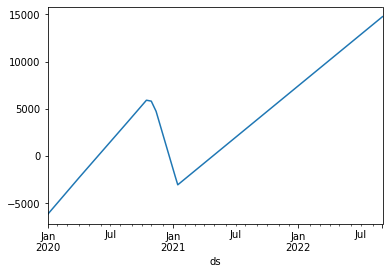

In [17]:
forecast.set_index('ds')['trend'].plot()

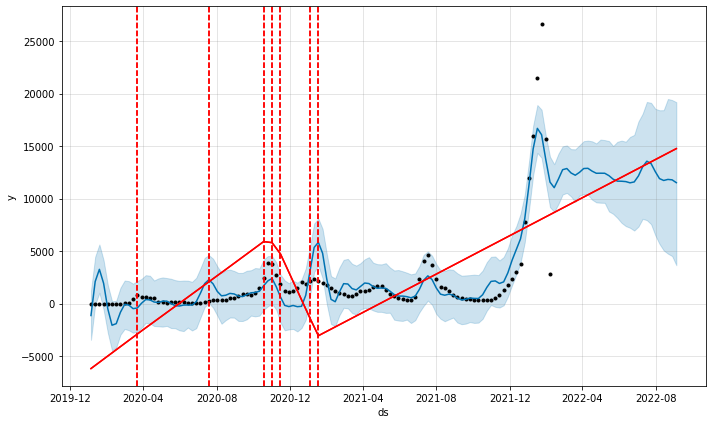

In [18]:
from fbprophet.plot import add_changepoints_to_plot
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
fig

In [19]:
# Guardamos el resultado en un fichero csv separado por comas. 
forecast.to_csv('covid_gerona.csv',  index=False, sep=";", decimal=",")

In [20]:
# Guardamos el resultado en un fichero csv separado por comas. 
gerona_df2.to_csv('covid_gerona1.csv',  index=False, sep=",", decimal=",")